# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


Seccion 1

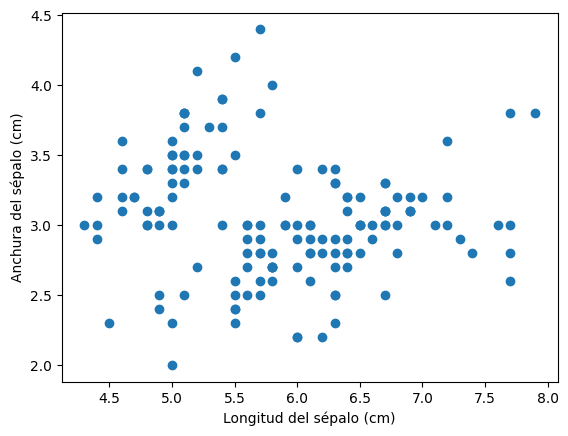

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('iris.csv')

# Gráfica de dispersión
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.show()


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


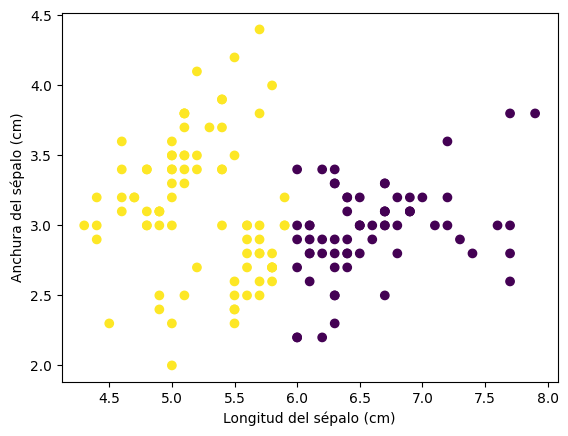

In [42]:
from sklearn.cluster import KMeans

# Preparar los datos
X = df[['sepal_length', 'sepal_width']]

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['sepal_length'], df['sepal_width'], c=labels)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.show()


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


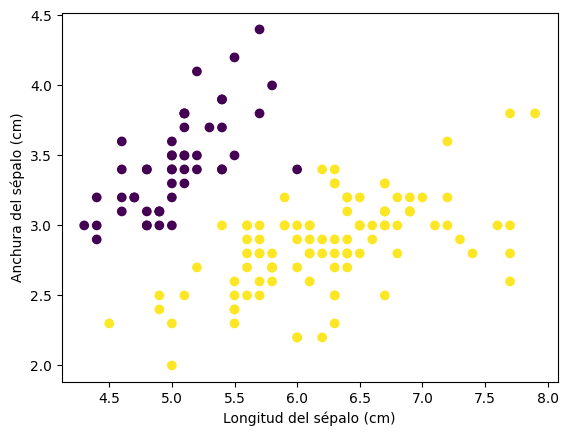

In [43]:
from sklearn.preprocessing import StandardScaler

# Preparar los datos
X = df[['sepal_length', 'sepal_width']]

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos estandarizados
kmeans.fit(X_std)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X_std)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['sepal_length'], df['sepal_width'], c=labels)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.show()


La diferencia que existe entre el paso 2 y paso 3 que se estandariza, es que en el paso 3 se ve mas ordenado ya que al estandarizarlos se logra que cada variable tenga una media cero y desviación estándar uno. Al hacer esto, se asegura que todas las variables tengan un peso similar en la agrupación, lo que puede mejorar el resultado.

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

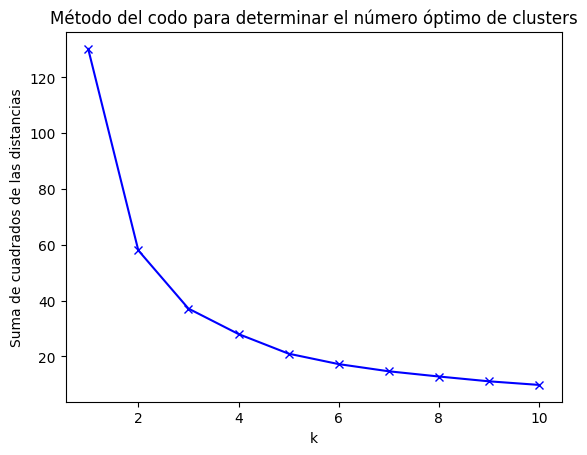

In [44]:
X = df.iloc[:, :2].values

sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de cuadrados de las distancias')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


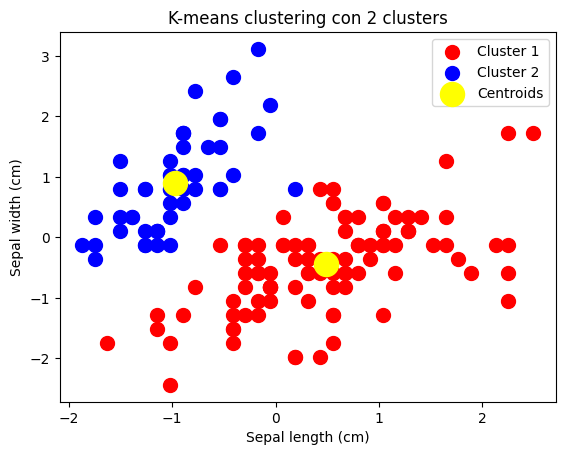

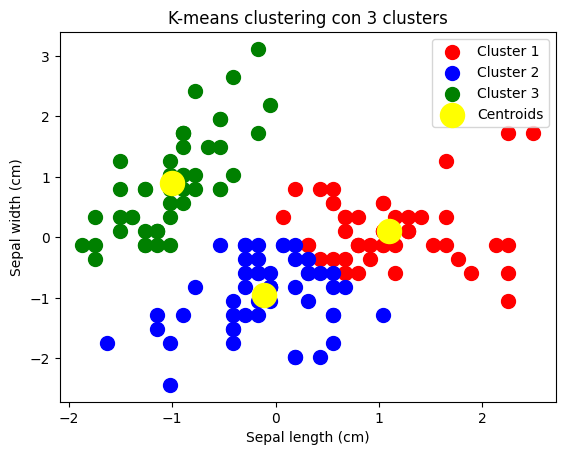

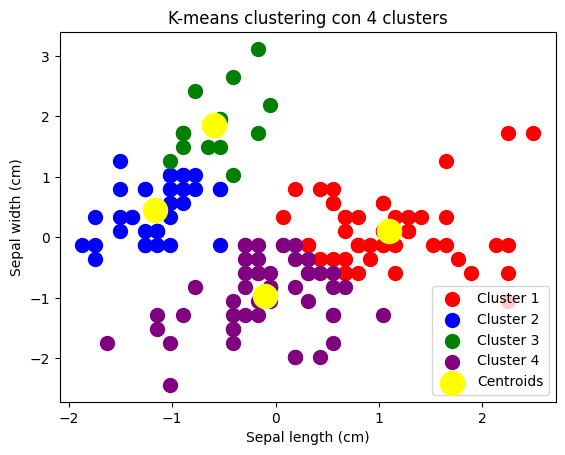

In [45]:
X = df.iloc[:, :2].values

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-means clustering con 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)

# K-means clustering con 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_3 = kmeans_3.fit_predict(X)

# K-means clustering con 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans_4 = kmeans_4.fit_predict(X)

# K-means clustering con 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_5 = kmeans_5.fit_predict(X)

# Gráfica con 2 clusters
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 2 clusters')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Gráfica con 3 clusters
plt.scatter(X[y_kmeans_3 == 0, 0], X[y_kmeans_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_3 == 1, 0], X[y_kmeans_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_3 == 2, 0], X[y_kmeans_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 3 clusters')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Gráfica con 4 clusters
plt.scatter(X[y_kmeans_4 == 0, 0], X[y_kmeans_4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_4 == 1, 0], X[y_kmeans_4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_4 == 2, 0], X[y_kmeans_4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_4 == 3, 0], X[y_kmeans_4 == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 4 clusters')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

In [46]:
#revisar este que no estoy seguro que este realmetne bien hecho

from sklearn.metrics import confusion_matrix

# cargar el archivo CSV
df_respuestas = pd.read_csv("iris-con-respuestas.csv")

# reemplazar los valores numéricos con los nombres de especies
df_respuestas["species"] = df_respuestas["species"].replace({0: "setosa", 1: "versicolor", 2: "virginica"})

# Extraer las etiquetas reales
y_real = df_respuestas["species"].replace({"setosa": 0, "versicolor": 1, "virginica": 2})

# Crear el modelo con dos clusters
model = KMeans(n_clusters=2)
model.fit(X_std)

# Predecir las etiquetas
y_pred = model.predict(X_std)

# Crear la matriz de confusión
cm = confusion_matrix(y_real, y_pred)
print(cm)

[[ 1 49  0]
 [49  1  0]
 [50  0  0]]


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



¿Funcionó el clustering con la forma del sépalo?
Sí, el clustering con la forma del sépalo pareció funcionar bien, al menos en términos de formar grupos separados en la visualización de los datos y en los resultados del modelo de K-Means.

Seccion 2

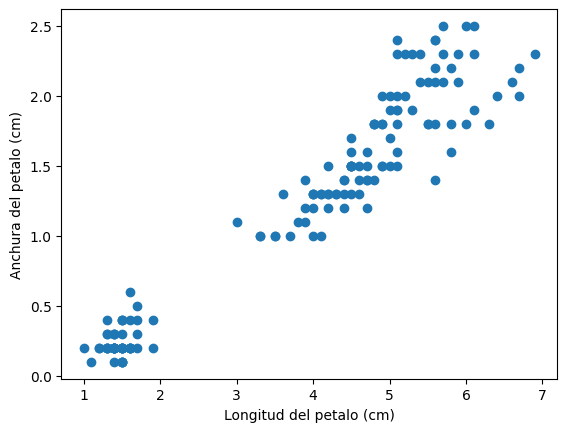

In [47]:
# Cargar los datos
df = pd.read_csv('iris.csv')

# Gráfica de dispersión
plt.scatter(df['petal_length'], df['petal_width'])
plt.xlabel('Longitud del petalo (cm)')
plt.ylabel('Anchura del petalo (cm)')
plt.show()


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


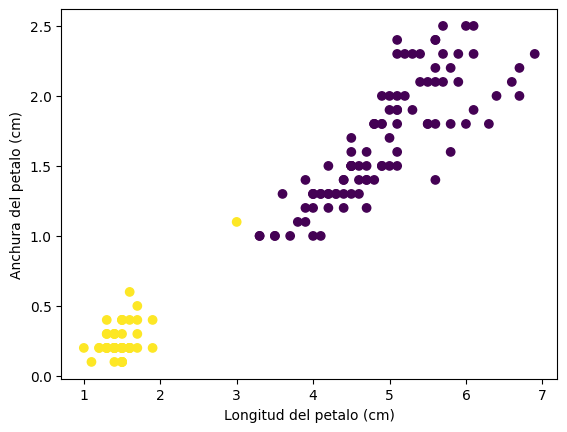

In [48]:
# Preparar los datos
X = df[['petal_length', 'petal_width']]

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['petal_length'], df['petal_width'], c=labels)
plt.xlabel('Longitud del petalo (cm)')
plt.ylabel('Anchura del petalo (cm)')
plt.show()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


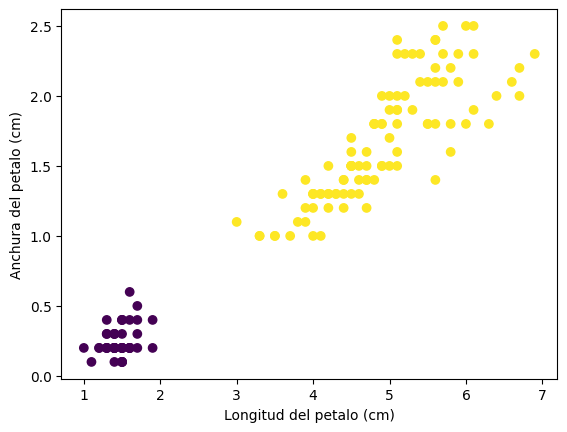

In [49]:
# Preparar los datos
X = df[['petal_length', 'petal_width']]

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos estandarizados
kmeans.fit(X_std)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X_std)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['petal_length'], df['petal_width'], c=labels)
plt.xlabel('Longitud del petalo (cm)')
plt.ylabel('Anchura del petalo (cm)')
plt.show()


La diferencia que se ve es que se logra agrupar correctamente los datos, ya que en la enterior habia un dato que formaba parte de los morados pero era amarrilllo y ahora al estandarizarlos esto se arregla

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

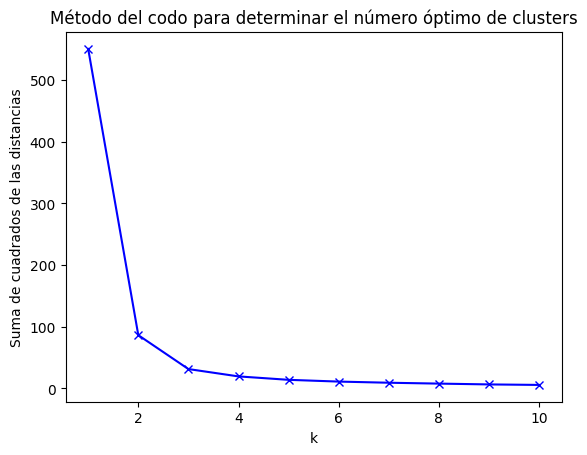

In [50]:
X = df.iloc[:, 2:].values

sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de cuadrados de las distancias')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


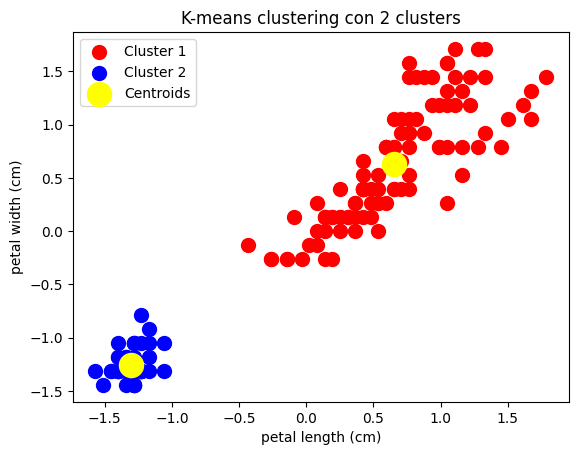

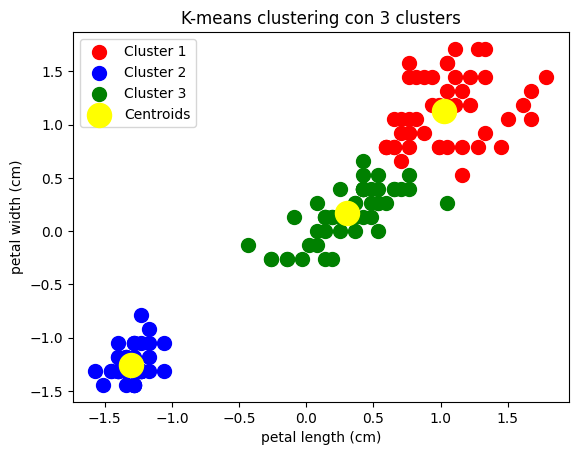

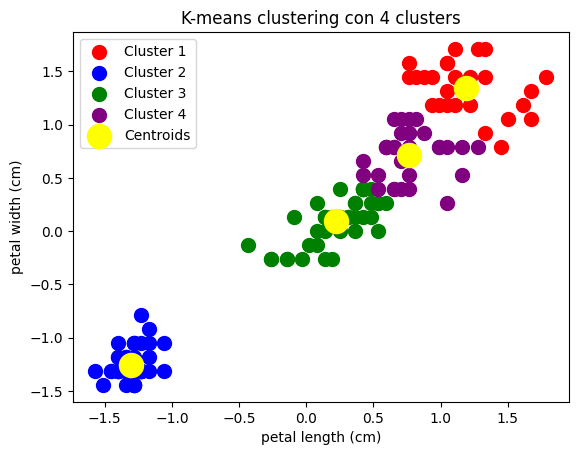

In [51]:
# Seleccionar las variables predictoras
X = df.iloc[:, 2:].values

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-means clustering con 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)

# K-means clustering con 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_3 = kmeans_3.fit_predict(X)

# K-means clustering con 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans_4 = kmeans_4.fit_predict(X)

# K-means clustering con 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_5 = kmeans_5.fit_predict(X)

# Gráfica con 2 clusters
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 2 clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

# Gráfica con 3 clusters
plt.scatter(X[y_kmeans_3 == 0, 0], X[y_kmeans_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_3 == 1, 0], X[y_kmeans_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_3 == 2, 0], X[y_kmeans_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 3 clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

# Gráfica con 4 clusters
plt.scatter(X[y_kmeans_4 == 0, 0], X[y_kmeans_4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_4 == 1, 0], X[y_kmeans_4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_4 == 2, 0], X[y_kmeans_4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_4 == 3, 0], X[y_kmeans_4 == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 4 clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()